# Transformadores de predicados

Um transformador de predicados, como o nome sugere, não é mais do que um operador que recebe um predicado e produz um predicado.
Uma técnica de verificação de segurança de sistemas dinâmicos que pode ser aplicada a SFOTS baseia-se neste conceito. Associado a uma transição $\;\mathsf{T}\,$, o transformador de predicados $\;\mathsf{wp_T}\;$, designado por **weakest pre-condition** mapeia um predicado genérico $\,\mathsf{Q}\,$ no  predicado $\;\mathsf{wp_T}(\mathsf{Q})\;$ que verifica, para todo o predicado $\;\mathsf{P}$, a seguinte propriedade
$$\mathsf{P}\,\to\,\mathsf{wp_T}(\mathsf{Q})\quad \text{sse} \quad\mathsf{P}\,\land\,\mathsf{T}\,\to\,\mathsf{Q}'\quad$$

O transformador de predicados $\;\mathsf{sp_T}$, associado a uma transição $\;\mathsf{T}\,$, designado por **strongest post-condition**, mapeia um predicado genérico $\,\mathsf{P}\,$ no  predicado $\;\mathsf{sp_T}(\mathsf{P})\;$ que verifica, para todo o predicado $\;\mathsf{Q}$,
$$\mathsf{sp_T}(\mathsf{P})\,\to\,\mathsf{Q}\quad \text{sse} \quad\mathsf{P}\,\land\,\mathsf{T}\,\to\,\mathsf{Q}'\quad$$

Relembramos estes tranformadores para os diversos tipos de transições, conforme apresentado nas aulas teóricas.

- Atribuição:  $ \quad\mathsf{T(X,X')}\;\equiv\; (\mathsf{X}' = \mathit{exp}(\mathsf{X}))$
   - $\mathsf{wp_T(Q)\;\equiv\;Q\{\mathsf{X}/\mathit{exp}(\mathsf{X})\} }$
   - $\mathsf{sp_T(P)\;\equiv\; P\{\mathsf{X}/\mathsf{Z}\}\,\land\,(\mathsf{X}=\mathit{exp}(\mathsf{Z})) }\quad$ sendo $\;\mathsf{Z}\;$ uma variável fresca
   
   
- Guarda: $\quad\mathsf{T(X,X')\;\equiv \;G(X)\,\land\, S(X,X')}\,$
   - $\mathsf{wp_T(Q)\;\equiv\; G \to \,wp_S(Q)}$
   - $\mathsf{sp_T(P)\;\equiv\;sp_S(G\land P)}$
   
   
- Escolha: $\quad \mathsf{T(X,X') \;\equiv\; \mathsf{T}_0(X,X') \;\lor\;\mathsf{T}_1(X,X')}$
   - $\mathsf{wp_{\mathsf{T}}(Q)\;\equiv\; \mathsf{wp}_{\mathsf{T}_0}(Q)\,\land\,\mathsf{wp}_{\mathsf{T}_1}(Q)}$
   - $\mathsf{sp_{\mathsf{T}}(P)\;\equiv\; \mathsf{sp}_{\mathsf{T}_0}(P)\,\lor\,\mathsf{sp}_{\mathsf{T}_1}(P)}$
   
   
- Composição: $\quad\mathsf{T(X,X')\;\equiv\;\exists\,Y\,\centerdot\,\mathsf{T}_0(X,Y)\land\mathsf{T}_1(Y,X')}$
   - $\mathsf{wp_\mathsf{T}(Q)\;\equiv\; \mathsf{wp}_{\mathsf{T}_0}(\mathsf{wp}_{\mathsf{T}_1}(Q))}$
   - $\mathsf{sp_\mathsf{T}(P)\;\equiv\; \mathsf{sp}_{\mathsf{T}_1}(\mathsf{sp}_{\mathsf{T}_0}(P))}$


- Atribuição não-determinística: $ \quad\mathsf{T(X,X')\;\equiv\; (X' = havoc(X))\;\equiv\; \bigvee\,a\,\centerdot\,(X'=a) }$ 
   - $\,\mathsf{wp_T(Q)\,\equiv\,\bigwedge\,a\,\centerdot\,Q\{X/a\} \,\equiv\,\forall\,a\,\centerdot\,Q\{X/a\}}$
   - $\mathsf{sp_T(P)\,\equiv\,\bigvee\,a\,\centerdot\,(X=a) \,\equiv\,\exists\,a\,\centerdot\,(X=a)}$


$$T = (y' = y \wedge  x'=y+1)$$

Exemplo WPC:

$$Q = (x>0)$$

$$\mathsf{wp_T}(\mathsf{Q}) = ? $$

$$\mathsf{wp_T}(\mathsf{Q}) = (y>-1)$$

Exemplo de pré-condição que não é a mais fraca:

$$P = (y>0)$$

Exemplo SPC:

$$P = (y>0)$$

$$\mathsf{sp_T}(\mathsf{P}) = ? $$

$$\mathsf{sp_T}(\mathsf{P}) =  y>0 \wedge x=y+1$$

Exemplo de pós-condições que não são as mais fortes:

$$Q = (y>0) $$

$$Q = (x>1) $$

$$Q = (y>-5) $$

In [1]:
%%capture
!yes | pip install pysmt
!yes | pysmt-install --z3

Os dois operadores $\;\mathsf{wp}\,$ e $\,\mathsf{sp}\,$  podem ser aplicados múltiplas vezes.  $\;\mathsf{sp}^n(\mathsf{I})\;$ é a pós-condição mais forte  após a aplicação $\,n\,$ vezes da transição $\,\mathsf{T}\,$ a partir de um estado inicial $\,s\in\mathsf{I}\,$. Formalmente tem-se
$\:\mathsf{sp}^0(\mathsf{I}) \;\equiv\;\mathsf{I}\:$ e $\:\mathsf{sp}^{n}(\mathsf{I})\;\equiv\;\mathsf{sp}(\mathsf{sp}^{n-1}(\mathsf{I}))\;$ para $n>0$.
De igual modo,  $\mathsf{wp}^m(\mathsf{E})\;$ é a pré-condição mais fraca que assegura um estado de erro $\,e\in\mathsf{E}\;$ após $\,m\,$ aplicações  da transição $\;\mathsf{T}$. Formalmente tem-se
$\mathsf{wp}^0(\mathsf{E}) \;\equiv\;\mathsf{E}\:$ e $\:\mathsf{wp}^{m}(\mathsf{E})\;\equiv\;\mathsf{wp}(\mathsf{wp}^{m-1}(\mathsf{E}))\:$ para $m>0$.

$\mathsf{sp}^\ast(\mathsf{I})\;\equiv\;\bigvee_{n=0}^\infty\;\mathsf{sp}^n(\mathsf{I})\:$ denota o conjunto  dos estados alcançáveis
e $\:\mathsf{wp}^\ast(\mathsf{E})\;\equiv\;\bigvee_{m=0}^\infty\;\mathsf{wp}^m(\mathsf{E})\:$ representa o conjunto dos estados inseguros.
O  sistema $\;\Sigma\;$ é seguro se estes dois conjuntos nunca se intersectam, isto é, se $\;\mathsf{sp}^\ast(\mathsf{I})\,\land\,\mathsf{wp}^\ast(\mathsf{E})\;$ é insatisfazível.

Nem $\;\mathsf{sp}^\ast(\mathsf{I})\;$ nem $\;\mathsf{wp}^\ast(\mathsf{E})\;$ pode ser computado (por ter um número infinito de disjunções), mas podemos esboçar um algoritmo de verificação baseado nesta ideia, recorrendo a aproximações destes predicados. 

### Exercício 1

Considere o seguinte programa anotado com uma pré-condição e desenhe um  "control flow automaton” (CFA) que o modele, seguindo as diretivas apresentadas nas aulas teóricas.
```Python
{ x >= 3 } 
while (x>0):
    if x == 2: 
        raise error
    x = x-5
stop
```

Pode-se assumir que o predicado dos estados iniciais é
$\mathsf{I}\;\equiv\;\mathsf{True}$ e associar um predicado a cada um dos locais do sistema de acordo com os seguintes princípios:
- Ao primeiro local de acessibilidade ($\,\mathsf{system}\,$) associamos a pré-condição mais forte $\;\mathsf{sp}(\mathsf{I})\,$, o que é determinado pelo comando  $\,\mathsf{havoc}\,$ seguido da guarda da transição. 
- Aos locais $\;\mathsf{stop}\;$ e $\;\mathsf{error}\;$ associamos predicados constantes que vão depender do tipo de problema que vamos tentar modelar. 
- Aos restantes locais associamos a pré-condição mais fraca.                       

### Exercício 2

À semelhança do apresentado nos apontamentos teóricos, escreva as definições recursivas que descrevem o CFA que construiu no exercício 1.

*(completar)*

Para determinar se existe algum estado acessível que seja um estado inseguro faz-se $\;\mathsf{error}\,\equiv\,\mathsf{True}\,$ e  $\;\mathsf{stop}\,\equiv\,\mathsf{False}\,$ e verifica-se se $\;\mathsf{system}\;$ é satisfazível (caso isso aconteça o sistema é inseguro).

### Exercício 3

Tendo por base o exercício 2, escreva uma função em python que, de forma iterativa, tente detectar uma situação em que o sistema é inseguro. A função pode receber dois argumentos um valor de entrada para x e o número de tentativas no cálculo aproximado de $\;\mathsf{wp}^\ast(\mathsf{E})\;$.

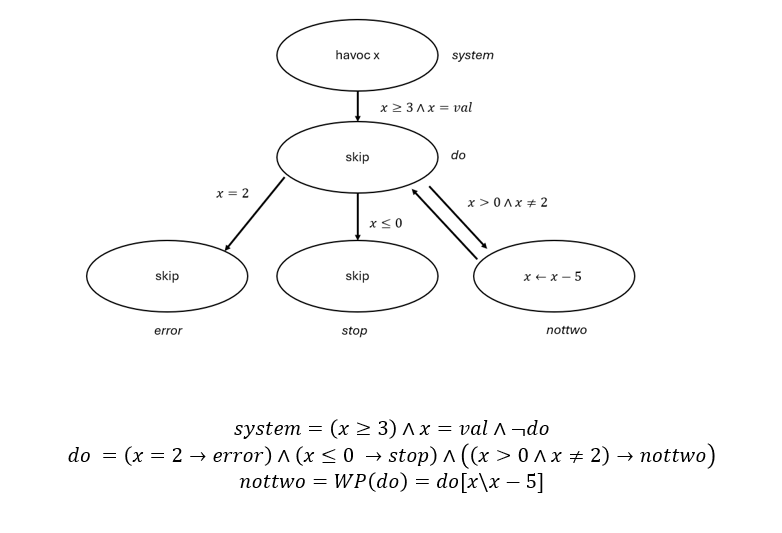

In [2]:
from pysmt.shortcuts import *
from pysmt.typing import INT

def ex1_safety(val, n):
    print(f"> A testar o caso x = {val} ({n} tentativas).")
    with Solver() as solver:
      x = Symbol("x", INT)
      error = TRUE()
      stop = FALSE()

      do = FALSE()
      guarda = And(GE(x, Int(3)), Equals(x, Int(val)))

      for i in range(n):
          system = And(guarda, do)
          if solver.solve([system]):
            print(f"> Iteração {i}: sistema inseguro.")
            return

          # do[x\x-5]
          atrib = substitute(do, {x: Minus(x, Int(5))})

          new_do = And(Implies(Equals(x, Int(2)), error),
                       Implies(LE(x, Int(0)), stop),
                       Implies(And(GE(x, Int(0)), NotEquals(x, Int(2))),
                               atrib))
          do = Or(do, new_do)

      print("> Não foram encontrados estados inseguros.")

In [3]:
ex1_safety(5,10)

> A testar o caso x = 5 (10 tentativas).
> Não foram encontrados estados inseguros.


In [4]:
ex1_safety(17,5)

> A testar o caso x = 17 (5 tentativas).
> Iteração 4: sistema inseguro.


In [5]:
# Versão genérica.
def ex1_safety_2(n):
    print(f"> A testar {n} iterações.")
    with Solver(name = "z3") as solver:
      x = Symbol("x", INT)
      error = TRUE()
      stop = FALSE()

      do = FALSE()
      guarda = And(GE(x, Int(3)),
                   NotEquals(Times(Div(x-Int(2),
                                       Int(5)),
                                   Int(5)),
                             Minus(x,
                                   Int(2))))

      for i in range(n):
          system = And(guarda, do)
          if solver.solve([system]):
            print(f"> Iteração {i}: sistema inseguro.")
            return

          # do[x\x-5]
          atrib = substitute(do, {x: Minus(x, Int(5))})

          new_do = And(Implies(Equals(x, Int(2)), error),
                       Implies(LE(x, Int(0)), stop),
                       Implies(And(GE(x, Int(0)), NotEquals(x, Int(2))),
                               atrib))

          # Tentar generalizar.
          R = And(do, Not(new_do))
          L =  And(new_do, Not(do))
          if solver.is_unsat(Or(R, L)):
              # do_n <-> do_{n-1}
              print(f"> Iteração {i}: sistema seguro.")
              return

          do = Or(do, new_do)

      print("> Não foram encontrados estados inseguros.")

ex1_safety_2(10)

> A testar 10 iterações.
> Não foram encontrados estados inseguros.


### Exercício 4

Experimente fortalecer a pré-condição da função de forma evitar situações de erro.

$(x-2)\%5 \neq 0$

$\leftrightarrow Div(x-2, 5)* 5 = x-2$ 

y múltiplo de m $\leftrightarrow Div(y, m)* m = y$ 

$Div(6, 3)* 3 = 6 \leftrightarrow 2*3 = 6$

$Div(7, 3)* 3 = 7 \leftrightarrow 2*3 = 7$

In [6]:
# completar

def ex2_safety(n, extra):
    print(f"* A testar {n} tentativas) com pré-condição extra {extra.serialize()}.")
    with Solver(name="z3") as solver:
      error = TRUE()
      stop = FALSE()

      do = FALSE()
      guarda = And(GE(x, Int(3)), extra)

      for i in range(n):
          system = And(guarda, do)
          if solver.solve([system]):
            print(f"> Iteração {i}: sistema inseguro.")
            return

          # do[x\x-5]
          atrib = substitute(do, {x: Minus(x, Int(5))})

          new_do = And(Implies(Equals(x, Int(2)), error),
                       Implies(LE(x, Int(0)), stop),
                       Implies(And(GE(x, Int(0)), NotEquals(x, Int(2))),
                               atrib))

          do = Or(do, new_do)

      print("> Não foram encontrados estados inseguros.")

x = Symbol("x", INT)
extra = TRUE()
ex2_safety(10, extra)
extra = NotEquals(Div(x-Int(2), Int(5))*Int(5), x-Int(2))
ex2_safety(10, extra)

* A testar 10 tentativas) com pré-condição extra True.
> Iteração 2: sistema inseguro.
* A testar 10 tentativas) com pré-condição extra (! ((((x - 2) / 5) * 5) = (x - 2))).
> Não foram encontrados estados inseguros.


# Versão com Grafo NetwokX

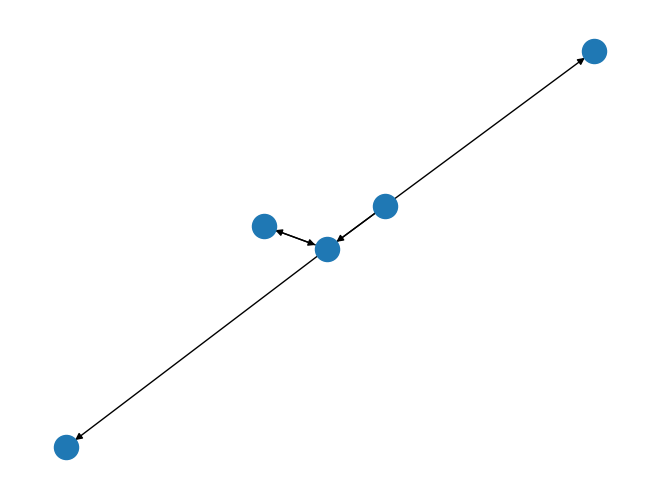

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

x = Symbol("x", INT)

# Nodes: label-annotation tuples.
nodes = [("system", "havoc x"),
         ("do", "skip"),
         ("error", "skip"),
         ("stop", "skip"),
         ("nottwo", Minus(x, Int(5)))]

# Edges: source-target-condition tuples.
edges = [("system", "do", GE(x, Int(3))),
         ("do", "stop", LE(x, Int(0))),
         ("do", "error", Equals(x, Int(2))),
         ("do", "nottwo", And(NotEquals(x, Int(2)),
                              GE(x, Int(0)))),
         ("nottwo", "do", "")]

for label, annotation in  nodes:
    G.add_node(label, annotation = annotation)

for source, target, condition in edges:
    G.add_edge(source, target, condition = condition)

nx.draw(G)

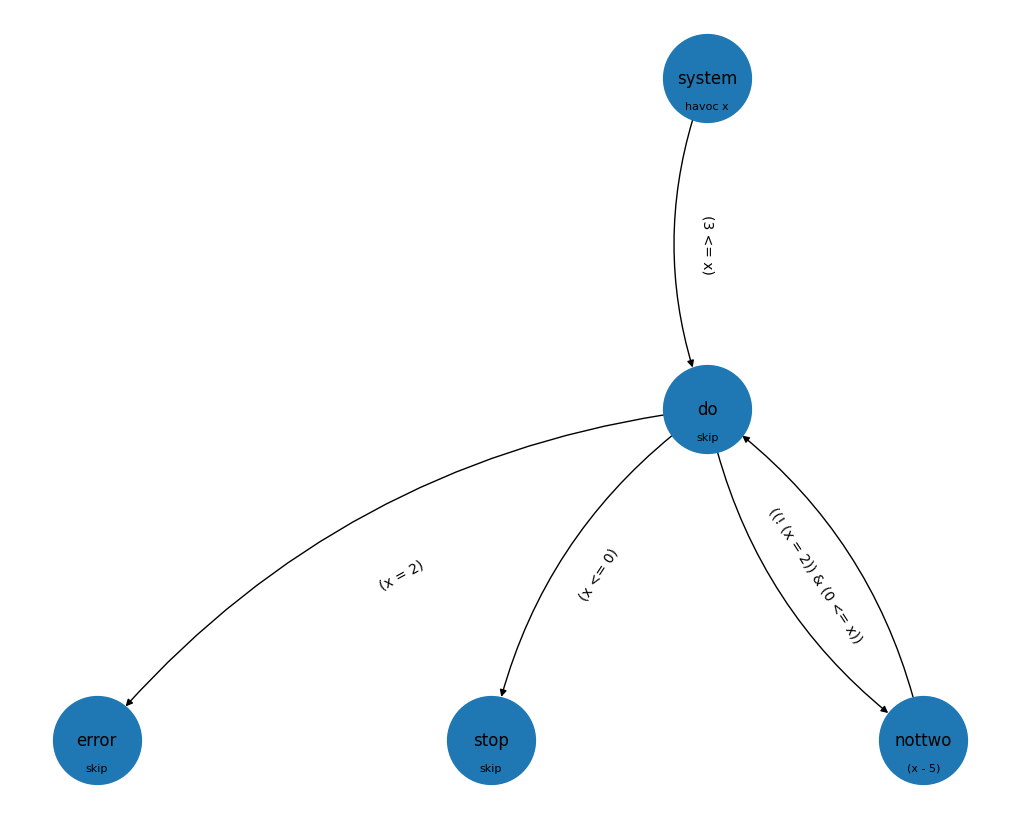

In [8]:
pos = nx.nx_pydot.pydot_layout(G, prog="dot")
plt.figure(figsize=(10, 8))
nx.draw(G, pos  = pos, with_labels = True, node_size = 4000, connectionstyle="arc3,rad=0.2")

edge_conds = nx.get_edge_attributes(G, name = "condition")
nx.draw_networkx_edge_labels(G, pos, edge_conds)

annotations = nx.get_node_attributes(G, 'annotation')
for node, annotation in annotations.items():
    xp, yp = pos[node]
    plt.text(xp, yp - 5, annotation, fontsize=8, ha='center', va='top')

plt.show()

In [9]:
def graph_safety(G, n):
    print(f"> A testar {n} iterações.")
    with Solver(name = "z3") as solver:
      x = Symbol("x", INT)
      error = TRUE()
      stop = FALSE()

      do = FALSE()

      extra =  NotEquals(Times(Div(x-Int(2),
                                       Int(5)),
                                   Int(5)),
                             Minus(x,
                                   Int(2)))

      for source, target, data in G.edges(data = True):
          if source == "system" and target == "do":
              guarda = data["condition"]

      guarda = And(guarda, extra)

      for i in range(n):
          system = And(guarda, do)
          if solver.solve([system]):
            print(f"> Iteração {i}: sistema inseguro.")
            return

          clauses = []
          for source, target, data in G.edges(data = True):
              if source == "do":
                condition = data["condition"]
                if target == "error":
                  clauses.append(Implies(condition, error))
                elif target == "stop":
                  clauses.append(Implies(condition, stop))
                else:
                  sub = G.nodes[target]["annotation"]
                  atrib = substitute(do, {x: sub})
                  clauses.append(Implies(condition, atrib))

          new_do = And(clauses)

          # Tentar generalizar.
          R = And(do, Not(new_do))
          L =  And(new_do, Not(do))
          if solver.is_unsat(Or(R, L)):
              # do_n <-> do_{n-1}
              print(f"> Iteração {i}: sistema seguro.")
              return

          do = Or(do, new_do)

      print("> Não foram encontrados estados inseguros.")

graph_safety(G, 10)

> A testar 10 iterações.
> Não foram encontrados estados inseguros.


### Exercício 5

Para determinar se existe algum estado acessível que conduza a uma paragem no estado $\;\mathsf{stop}\;$, pode-se fazer  $\;\mathsf{stop}\,\equiv\,\mathsf{True}\,$ e $\;\mathsf{error}\,\equiv\,\mathsf{False}\,$ e verificar se $\,\mathsf{system}\,$ é satisfazível. Codifique uma função python que implementa este teste.

In [10]:
def ex1_safety_2(n):
    print(f"> A testar {n} iterações.")
    with Solver(name = "z3") as solver:
      x = Symbol("x", INT)
      error = FALSE()
      stop = TRUE()

      do = FALSE()
      guarda = And(GE(x, Int(3)),
                   NotEquals(Times(Div(x-Int(2),
                                       Int(5)),
                                   Int(5)),
                             Minus(x,
                                   Int(2))))

      for i in range(n):
          system = And(guarda, do)
          if solver.solve([system]):
            print(f"> Iteração {i}: stop é acessível.")
            return

          # do[x\x-5]
          atrib = substitute(do, {x: Minus(x, Int(5))})

          new_do = And(Implies(Equals(x, Int(2)), error),
                       Implies(LE(x, Int(0)), stop),
                       Implies(And(GE(x, Int(0)), NotEquals(x, Int(2))),
                               atrib))

          do = Or(do, new_do)

      print("> Não foram encontrados estados inseguros.")

ex1_safety_2(10)

> A testar 10 iterações.
> Iteração 2: stop é acessível.
